<div dir="rtl">
 بسم الله الرحمن الرحیم

**نام:** امیرحسن بینائی شهری  
 تابستان ۱۴۰۴  

در این پروژه، هدف ما استفاده از الگوریتم K-NN (نزدیک‌ترین همسایه) برای طبقه‌بندی داده‌های دو بعدی است. ابتدا داده‌های آموزشی دو بعدی به‌صورت تصادفی ایجاد می‌شوند و هر داده به یکی از دو کلاس (۰ یا ۱) تعلق دارد. سپس یک نمونه‌ی جدید تولید شده و با استفاده از K-NN، کلاس آن بر اساس نزدیک‌ترین همسایگانش پیش‌بینی می‌شود.

از کتابخانه‌های `OpenCV` برای پیاده‌سازی مدل KNN، و از `NumPy` برای تولید داده‌ها و `Matplotlib` برای ترسیم داده‌ها استفاده شده است.

در ادامه، خط‌به‌خط کدها آورده شده‌اند و برای هر بخش توضیح دقیق در قالب کامنت قرار داده شده است.
</div>

وارد کردن کتابخانه‌ها

In [58]:
import cv2  # کتابخانه OpenCV برای پردازش تصویر و پیاده‌سازی الگوریتم‌های یادگیری ماشین
import numpy as np  # کتابخانه‌ای برای محاسبات عددی، تولید داده و کار با آرایه‌ها
import pandas as pd  # وارد کردن کتابخانه‌ی pandas برای ساخت DataFrame
import matplotlib.pyplot as plt  # کتابخانه‌ای برای رسم نمودار و نمایش داده‌ها

تولید داده‌های آموزشی و پاسخ‌ها

In [59]:
np.random.seed(40)  # تنظیم مقدار اولیه برای تولید اعداد تصادفی به‌صورت قابل تکرار

# تولید ۳۰ نقطه‌ی دوبعدی با مقادیر بین ۰ تا ۱۰۰ به‌صورت float32
trainData = np.random.randint(0, 100, (30, 2)).astype(np.float32)

# تولید ۳۰ مقدار کلاس (۰ یا ۱) برای هر نقطه، به‌صورت float32
responses = np.random.randint(0, 2, (30, 1)).astype(np.float32)


<div dir="rtl">
تبدیل trainData و responses به DataFrame
</div>

In [60]:
# ساخت DataFrame از trainData با نام‌گذاری ستون‌ها
df_train = pd.DataFrame(trainData, columns=['X1', 'X2'])

# اضافه کردن ستون کلاس (responses) به عنوان 'Label'
df_train['Label'] = responses.astype(int)  # تبدیل به int برای نمایش ۰ یا ۱

# نمایش جدول
df_train

,X1,X2,Label
0,70.0,91.0,1
1,7.0,37.0,1
2,56.0,50.0,0
3,65.0,12.0,1
4,71.0,19.0,1
5,31.0,74.0,1
6,55.0,83.0,0
7,59.0,91.0,1
8,73.0,96.0,1
9,49.0,53.0,0


 رسم داده‌ها بر اساس کلاس آن‌ها

C:\Users\XMART\AppData\Local\Temp\ipykernel_1316\1810288484.py:5: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
C:\Users\XMART\AppData\Local\Temp\ipykernel_1316\1810288484.py:11: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')


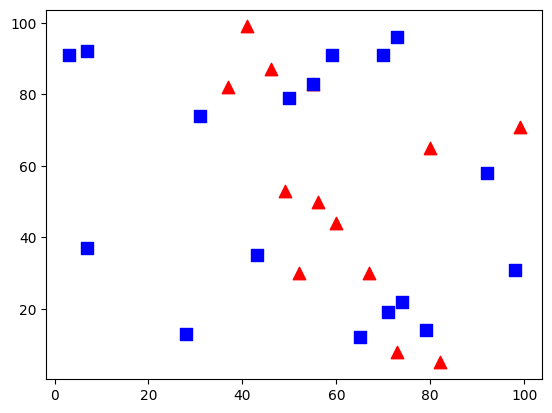

In [61]:
# انتخاب نقاطی که کلاس آن‌ها ۰ است
red = trainData[responses.ravel() == 0]

# رسم نقاط کلاس ۰ با رنگ قرمز و شکل مثلث
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

# انتخاب نقاطی که کلاس آن‌ها ۱ است
blue = trainData[responses.ravel() == 1]

# رسم نقاط کلاس ۱ با رنگ آبی و شکل مربع
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')


ایجاد یک عضو جدید برای پیش‌بینی

In [62]:
np.random.seed(42)  # تنظیم مقدار اولیه برای تولید داده‌ی تکرارپذیر

# تولید یک نقطه‌ی جدید دوبعدی بین ۰ تا ۱۰۰
newmember = np.random.randint(0, 100, (1, 2)).astype(np.float32)

# نمایش مقدار عضو جدید
newmember


array([[51., 92.]], dtype=float32)

C:\Users\XMART\AppData\Local\Temp\ipykernel_1316\1291742393.py:1: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(newmember[: , 0], newmember[: , 1], 80, 'g', 'o')


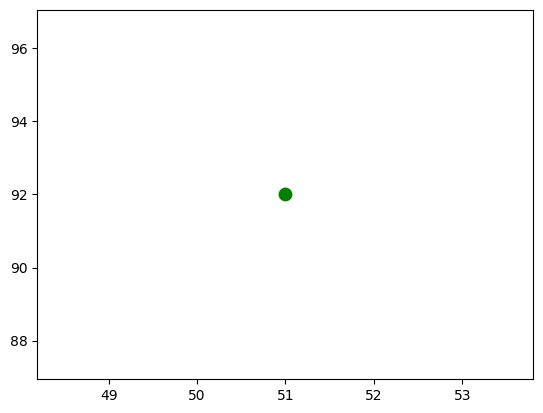

In [63]:
plt.scatter(newmember[: , 0], newmember[: , 1], 80, 'g', 'o')


ساخت مدل KNN و پیش‌بینی کلاس عضو جدید

In [64]:
# ایجاد مدل KNN از طریق OpenCV
knn = cv2.ml.KNearest_create()

# آموزش مدل با داده‌های آموزشی و پاسخ‌ها
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)

# پیدا کردن ۳ نزدیک‌ترین همسایه به عضو جدید
ret, results, neighbours, dist = knn.findNearest(newmember, 3)


نمایش خروجی‌های مدل

In [65]:
# نمایش کلاسی که برای عضو جدید پیش‌بینی شده
print("Return:", ret, "\n")

# نمایش پاسخ نهایی مدل
print("result:", results, "\n")

# نمایش سه همسایه‌ی نزدیک‌تر
print("neighbours:", neighbours, "\n")

# نمایش فاصله‌ی عضو جدید با هر همسایه
print("distance:", dist)

# نمایش نمودار داده‌ها که در سلول سوم رسم شده بود
plt.show()


Return: 0.0 

result: [[0.]] 

neighbours: [[0. 1. 0.]] 

distance: [[50. 65. 97.]]


<div dir="rtl">
# ادامه پروژه - نسخه سه‌بعدی

در این بخش، نسخه‌ای از همان پروژه طبقه‌بندی KNN را گسترش می‌دهیم تا بتوانیم داده‌هایی با **سه ویژگی (سه بعد)** تولید کرده و آن‌ها را طبقه‌بندی کنیم.

تفاوت اصلی در اینجا آن است که:
- داده‌ها به‌جای دوبعدی، سه‌بعدی هستند (مثلاً به‌جای مختصات X و Y، حالا X، Y و Z داریم)
- برای نمایش داده‌ها از **نمودار سه‌بعدی** استفاده شده است
- پیش‌بینی عضو جدید در فضای سه‌بعدی انجام می‌شود

کد زیر ادامه کد قبلی است و کاملاً قابل اجراست.
</div>

In [66]:
from mpl_toolkits.mplot3d import Axes3D  # برای ترسیم نمودار سه‌بعدی


In [67]:
np.random.seed(40)  # برای تکرارپذیری اعداد تصادفی

# تولید ۳۰ نقطه‌ی تصادفی سه‌بعدی با مقادیر بین ۰ تا ۱۰۰
trainData_3D = np.random.randint(0, 100, (30, 3)).astype(np.float32)

# تولید کلاس‌های مربوط به داده‌ها (۰ یا ۱)
responses_3D = np.random.randint(0, 2, (30, 1)).astype(np.float32)

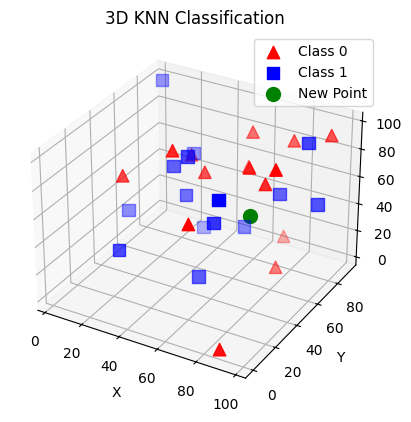

In [68]:
# جداسازی داده‌ها بر اساس کلاس برای ترسیم
red_3d = trainData_3D[responses_3D.ravel() == 0]
blue_3d = trainData_3D[responses_3D.ravel() == 1]

# ایجاد یک نمودار سه‌بعدی
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ترسیم نقاط کلاس ۰ (قرمز، مثلث)
ax.scatter(red_3d[:, 0], red_3d[:, 1], red_3d[:, 2], c='r', marker='^', s=80, label='Class 0')

# ترسیم نقاط کلاس ۱ (آبی، مربع)
ax.scatter(blue_3d[:, 0], blue_3d[:, 1], blue_3d[:, 2], c='b', marker='s', s=80, label='Class 1')

# ایجاد یک عضو جدید برای پیش‌بینی
np.random.seed(42)
new_point_3d = np.random.randint(0, 100, (1, 3)).astype(np.float32)

# نمایش آن در نمودار
ax.scatter(new_point_3d[:, 0], new_point_3d[:, 1], new_point_3d[:, 2], c='g', marker='o', s=100, label='New Point')

# تنظیم عنوان و نمایش نمودار
ax.set_title('3D KNN Classification')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [69]:
# ایجاد مدل KNN و آموزش آن
knn3D = cv2.ml.KNearest_create()
knn3D.train(trainData_3D, cv2.ml.ROW_SAMPLE, responses_3D)

# پیدا کردن ۳ همسایه نزدیک
ret3D, result3D, neighbours3D, dist3D = knn3D.findNearest(new_point_3d, 3)

In [70]:


# نمایش کلاسی که برای عضو جدید پیش‌بینی شده
print("Return:", int(ret3D))

# نمایش پاسخ نهایی مدل
print("result:", result3D)

# نمایش سه همسایه‌ی نزدیک‌تر
print("neighbours:", neighbours3D)

# نمایش فاصله‌ی عضو جدید با هر همسایه
print("distance:", dist3D)



Return: 1
result: [[1.]]
neighbours: [[0. 1. 1.]]
distance: [[411. 437. 581.]]
